# TP Modèles Markoviens 




In [ ]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

## Part 1
Programmation de l'échantillonneur de Gibbs et tirage d'échantillons de modèles markoviens 

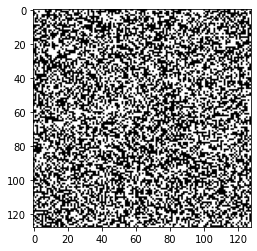

In [ ]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Fonction echan
Compléter la fonction suivante qui prend en entrée une image binaire qui sera mise à jour par échantillonnage de Gibbs et la valeur du paramètre de régularisation 

In [ ]:
def echan(im_bin,beta_reg):
    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          #ne pas modifier ces indices 
          #ils permettent d'accéder aux pixels voisins 
          # i1,j et i2,j et i,j1 et i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # compléter le calcul des énergies et proba assosiées 
        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg0=(im_bin[i1,j]  + im_bin[i2,j] + im_bin[i,j1] + im_bin[i1,j2])*beta_reg
            p0=math.exp(-Ureg0);

        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg1=np.abs(im_bin[i1,j]-1  + im_bin[i2,j]-1 + im_bin[i,j1]-1 + im_bin[i1,j2]-1)*beta_reg
            p1=math.exp(-Ureg1);

        #tirage selon les probabilités normalisées NB la normalisation est effectuée ici
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1

    return im_bin

En faisant varier la valeur du paramètre de régularisation et en relançant la cellule, observez. Vous pouvez enlever la visualisation en cours d'échantillonnage et augmenter le nombre d'itérations. 


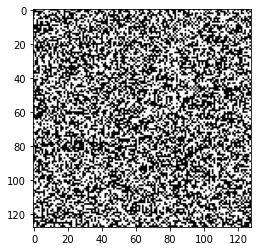

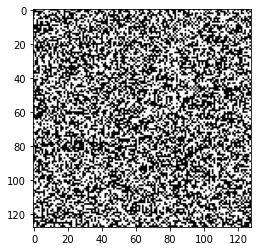

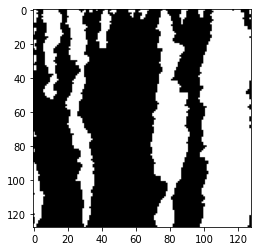

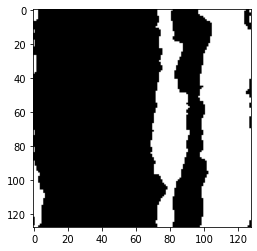

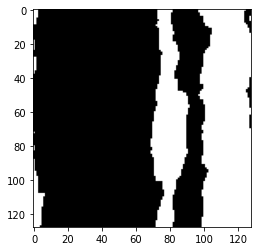

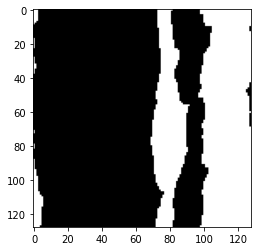

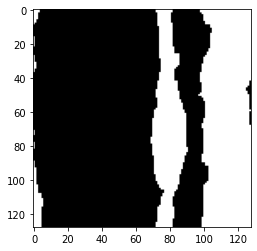

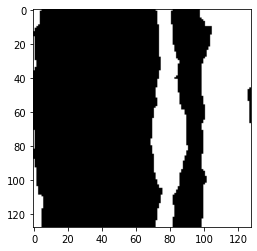

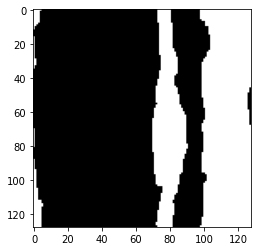

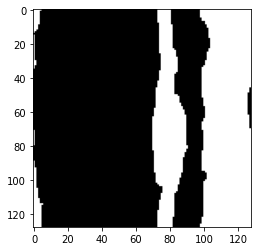

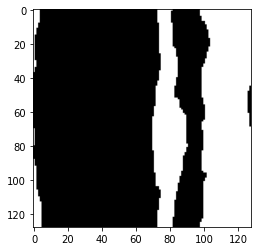

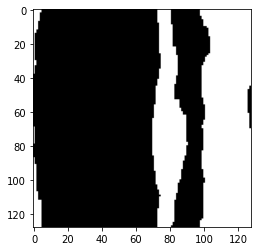

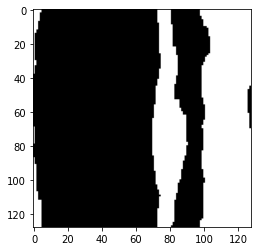

In [ ]:
#initialisation aléatoire de im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg = 30

mafigure=plt.figure()
plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

for n in range(10):  
    echan(im_bin,beta_reg) 
    plt.imshow(im_bin)      
    mafigure.canvas.draw()
    plt.show(block=False)
    

plt.figure()
plt.imshow(im_bin)
plt.show()